<a href="https://colab.research.google.com/github/kkimyunjoo/24-1-ESAA/blob/main/0315_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 머신러닝 판다스 데이터분석**

pg. 147 ~ 169




**2. Seaborn 라이브러리 - 고급 그래프 도구**

- 회귀선이 있는 산점도
  - regplot() : 서로 다른 2개의 연속 변수 사이의 산점도 + 선형회귀분서게 의한 회귀선
  - fit_reg=False : 회귀선 X
- 히스토그램/커널 밀도 그래프
  - displot() : 단변수 데이터의 분포 확인
  - hist=False: 히스토그램 X
  - kde=False : 커널 밀도 그래프 X
- 히트맵: heatmap()
  - 2개의 범주형 변수를 각각 x,y축에 놓고 데이터를 매트릭스 형태로 분류
  - 피벗테이블로 정리: 한 변수를 행 인덱스, 나머지 변수를 열 이름
- 범주형 데이터의 산점도 : stripplot(), swarmplot()
  - swarmplot() : 데이터의 분산까지 고려, 데이터 포인트가 서로 중복 X
  
    (데이터가 퍼져 있는 정도를 입체적으로 볼 수 있음)
- 막대 그래프
  - barplot()

- 빈도 그래프 : countplot()
  - 각 범주에 속하는 데이터의 개수를 막대 그래프로 나타냄
  - palette 옵션 변경 : 그래프 색 구성 변경

- 박스 플롯. 바이올린 그래프
  - violinplot() : 커널 밀도 함수 그래프를 y축 방향에 추가

- 조인트 그래프 : jointplot()
  - 산점도를 기본으로 표시, x-y축에 각 변수에 대한 히스토그램을 동시에 보여줌

- 조건을 적용하여 화면을 그리드로 분할하기
  - FacetGrid() : 행, 열 방향으로 서로 다른 조건을 적용 -> 여러 개의 서브 플롯 만듬

- 이변수 데이터의 분포
  - pairplot() : 인자로 전달되는 데이터프레임의 열(변수)을 두 개 씩 짝을 지울 수 있는 모든 조합에 대해 표현



In [2]:
#라이브러리 불러오기
import seaborn as sns

#titanic 데어터셋 가져오기
titanic = sns.load_dataset('titanic')

#titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

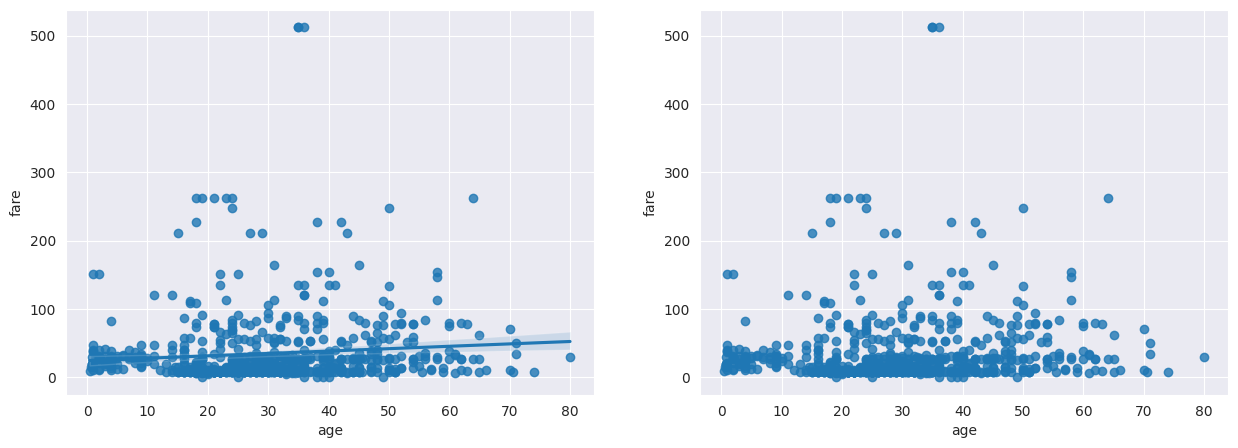

In [7]:
##회귀선이 있는 점선도

#라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

#그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

#그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',      #x축 변수
            y='fare',     #y축 변수
            data=titanic, #데이터
            ax=ax1)       #axe 객체=1번째 그래프

#그래프 그리기=선형 회귀선 미표시(fit_reg=False)
sns.regplot(x='age',      #x축 변수
            y='fare',     #y축 변수
            data=titanic, #데이터
            ax=ax2,
            fit_reg=False)       #axe 객체=1번째 그래프

plt.show()

<ipython-input-11-5d8e48b57c72>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'],ax=ax1)


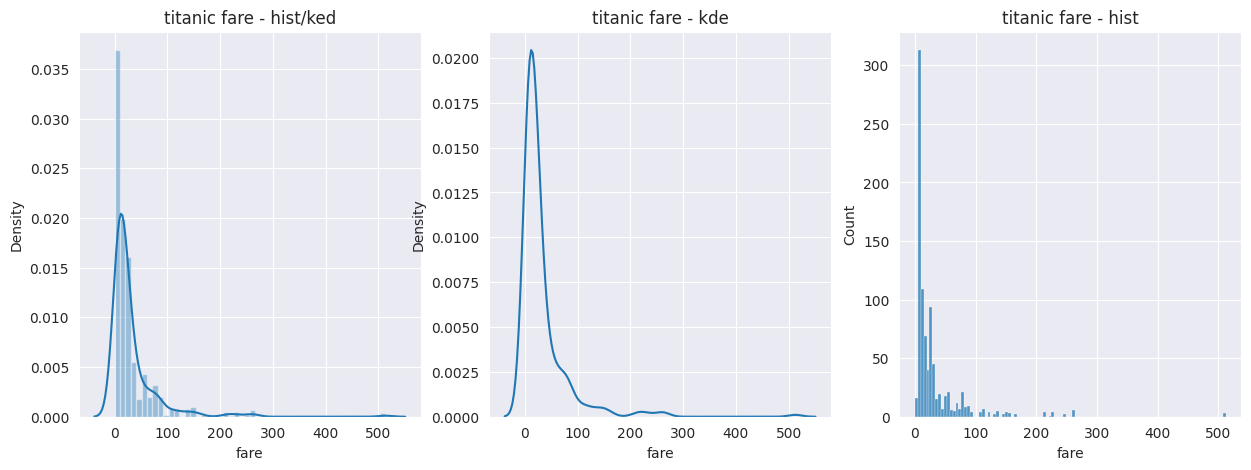

In [11]:
##히스토그램/커널 밀도 그래프

#그래프 객체 설정
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#distplot
sns.distplot(titanic['fare'],ax=ax1)

#kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2)

#histplot
sns.histplot(x='fare', data=titanic, ax=ax3)

#차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - kde')
ax3.set_title('titanic fare - hist')

plt.show()

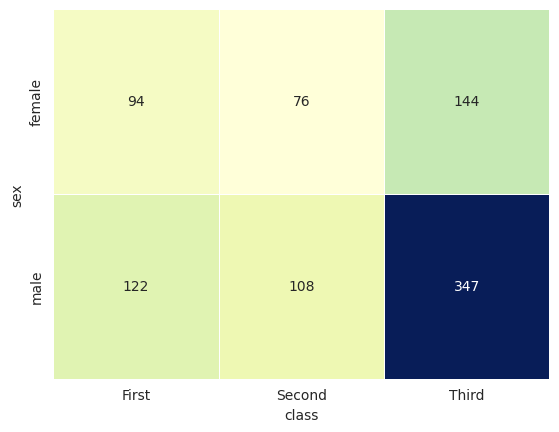

In [12]:
##히트맵

#피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'],columns=['class'],aggfunc = 'size')

#히트맵 그리기
sns.heatmap(table,                    #데이터 프레임
            annot = True, fmt = 'd',  #데이터 값 표시 여부, 정수형 포맷
            cmap = 'YlGnBu',          #컬러 맵
            linewidth= 0.5,           #구분 선
            cbar = False)             #컬러 바 표시 여부


plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


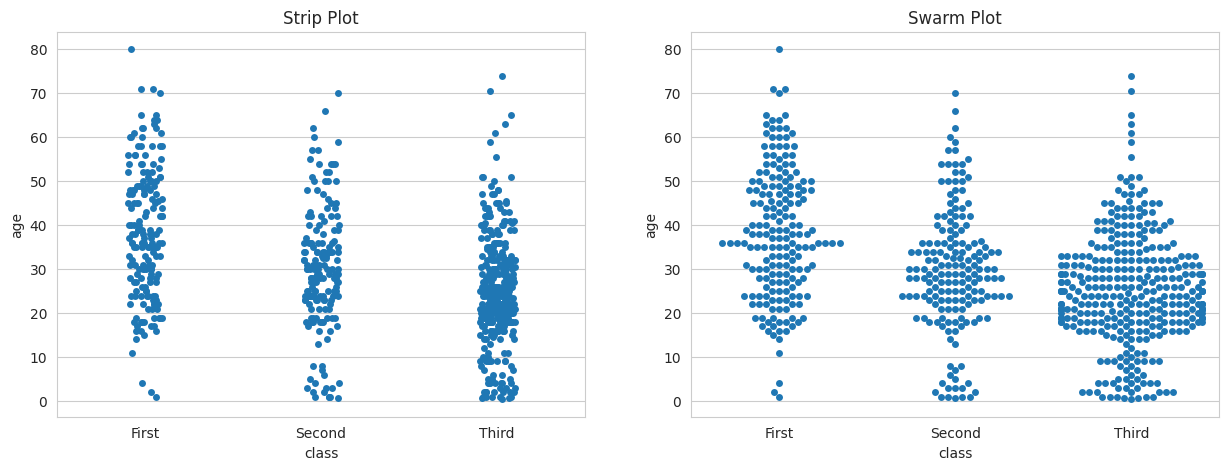

In [13]:
##범주형 데이터의 산점도

#라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지: darkgrid,whitegrid,dark,white,ticks)
sns.set_style('whitegrid')

#그래프 객체 생성(figure 2에 서브 플롯 생성)
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#이산형 변수의 분포 - 데이터 분산 미고려(중복 표시O)
sns.stripplot(x = 'class',       #x축 변수
              y = 'age',         #y축 변수
              data = titanic,    #데이터 셋 - 데이터프레임
              ax = ax1)           #axe 객체 - 1번째 그래츠


#이산형 변수의 분포 - 데이터 분산 고려(중복 표시 X)
sns.swarmplot(x = 'class',      #x축 변수
              y = 'age',        #y축 변수
              data = titanic,   #데이터 셋 - 데이터프레임
              ax=ax2)            #axe 객체 - 2번째 그래프


#차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

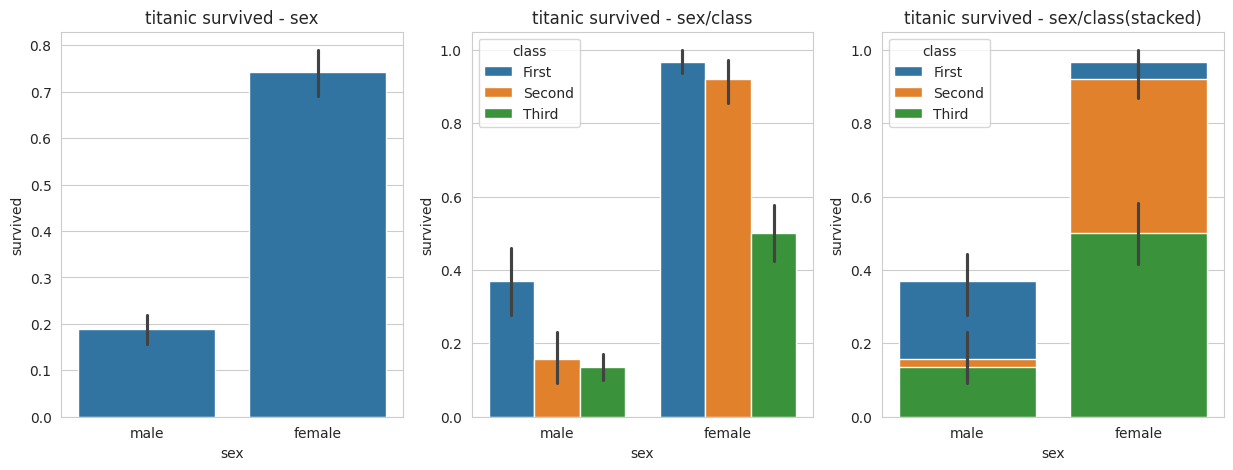

In [14]:
##막대 그래프

#그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#x축. y축에 변수 할당
sns.barplot(x = 'sex',y = 'survived',data = titanic,ax=ax1)

#x축. y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x = 'sex',y = 'survived',hue='class',data = titanic, ax=ax2)

#x축. y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x ='sex',y = 'survived',hue='class',dodge=False,data=titanic,ax=ax3)

#차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

<ipython-input-15-3c3c9d51971b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'class', palette = 'Set1',data=titanic,ax=ax1)


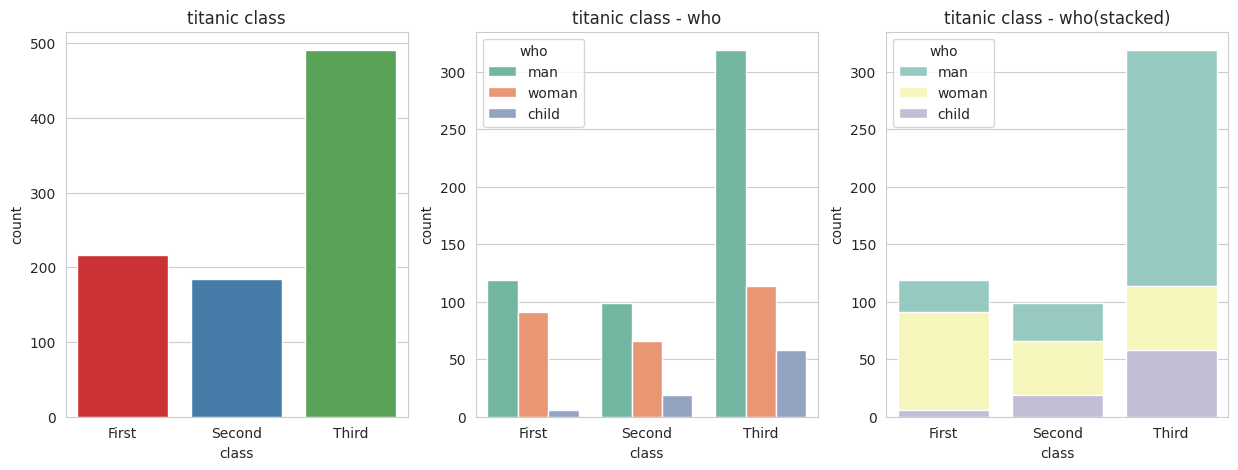

In [15]:
##빈도 그래프

#그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#기본값
sns.countplot(x = 'class', palette = 'Set1',data=titanic,ax=ax1)

#hue 옵션에 'who' 추가
sns.countplot(x='class',hue='who',palette='Set2',data=titanic,ax=ax2)

#dodge=False 옵션 추가(축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class',hue='who',palette='Set3',dodge=False,data=titanic,ax=ax3)

#차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

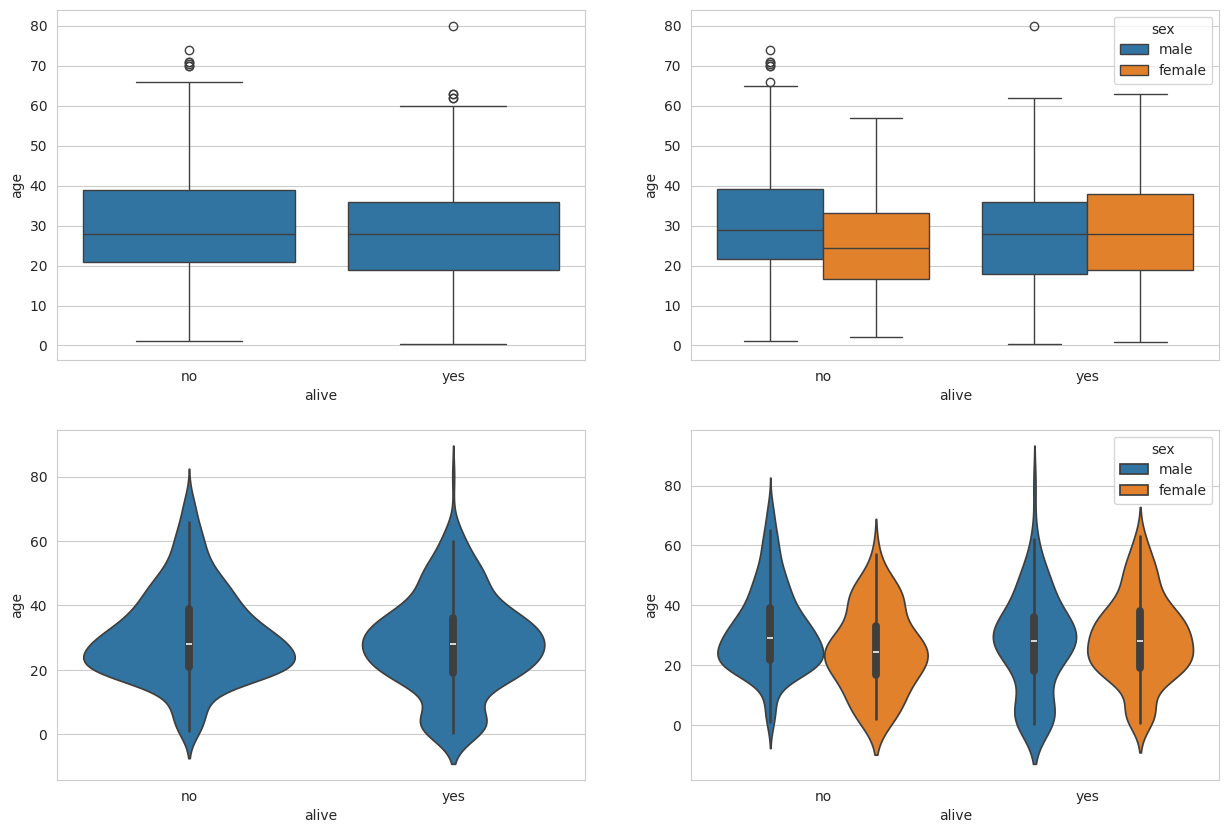

In [16]:
##박스 플롯/바이올린 그래프

#라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#그래프 객체 생성(figure에 4개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#박스 플롯 - 기본값
sns.boxplot(x='alive',y='age',data=titanic,ax=ax1)

#박스 플롯 그래프 - hue 변수 추가
sns.boxplot(x='alive',y='age',hue='sex',data=titanic,ax=ax2)

#바이올린 그래프 - 기본값
sns.violinplot(x='alive',y='age',data=titanic,ax=ax3)

#바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive',y='age',hue='sex',data=titanic,ax=ax4)

plt.show()

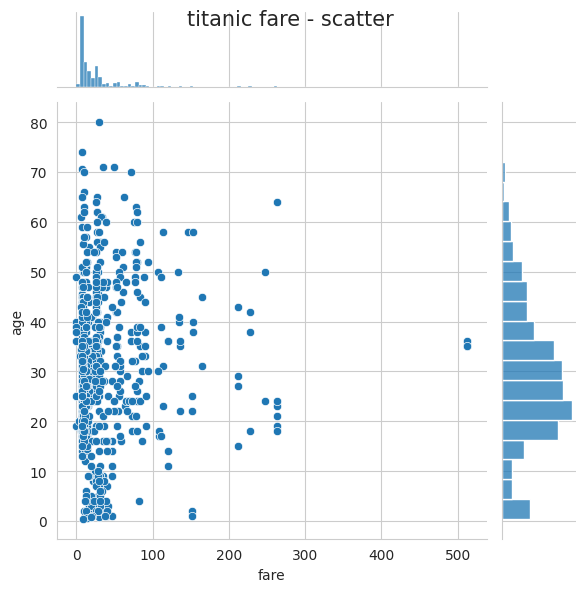

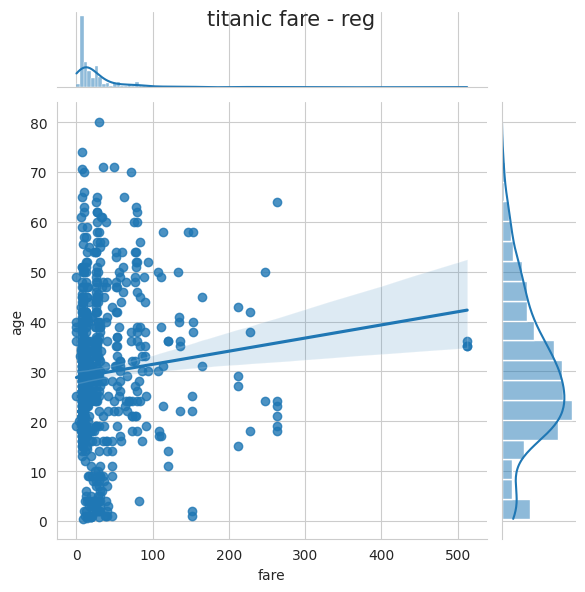

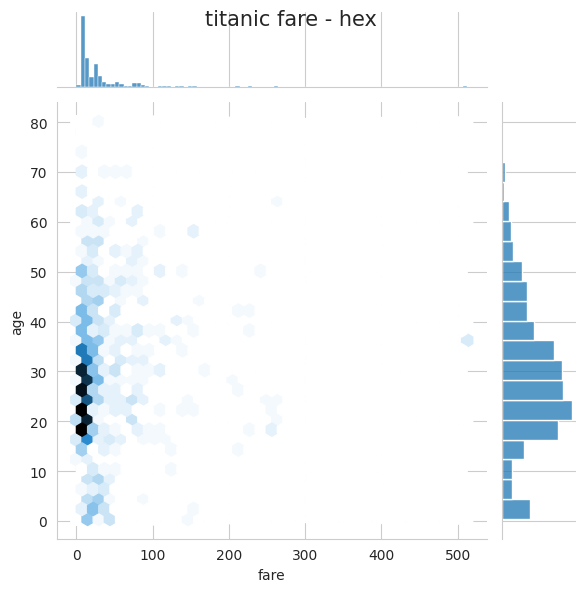

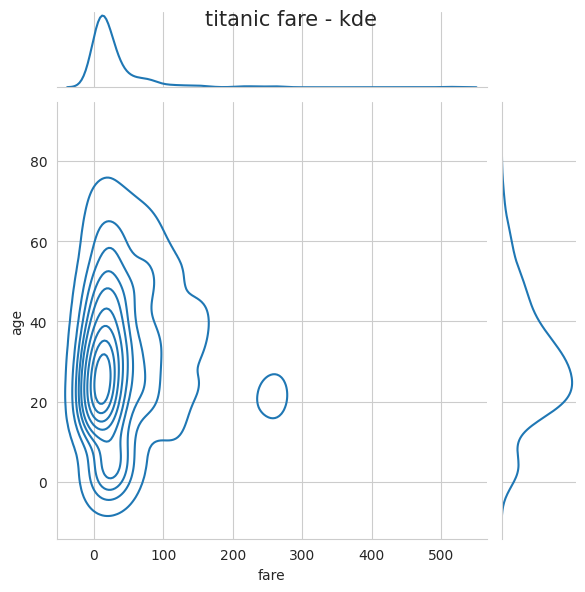

In [20]:
##조인트 그래프

#라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare',y='age',data=titanic)

#조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare',y='age',kind='reg',data=titanic)

#조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare',y='age',kind='hex',data=titanic)

#조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x='fare',y='age',kind='kde',data=titanic)

#차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

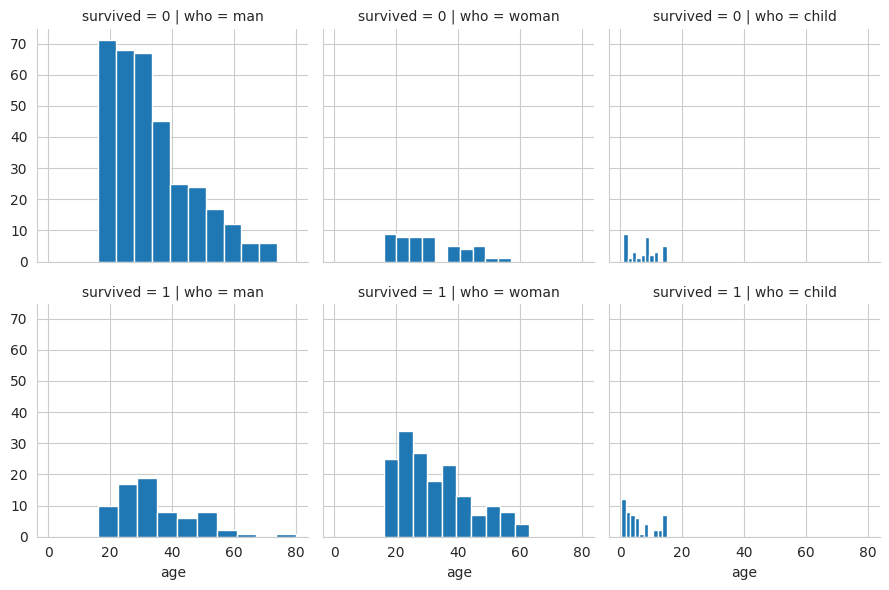

In [21]:
##조건에 맞는 화면 분할

#라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic,col='who',row='survived')

#그래프 적용하기
g = g.map(plt.hist,'age')

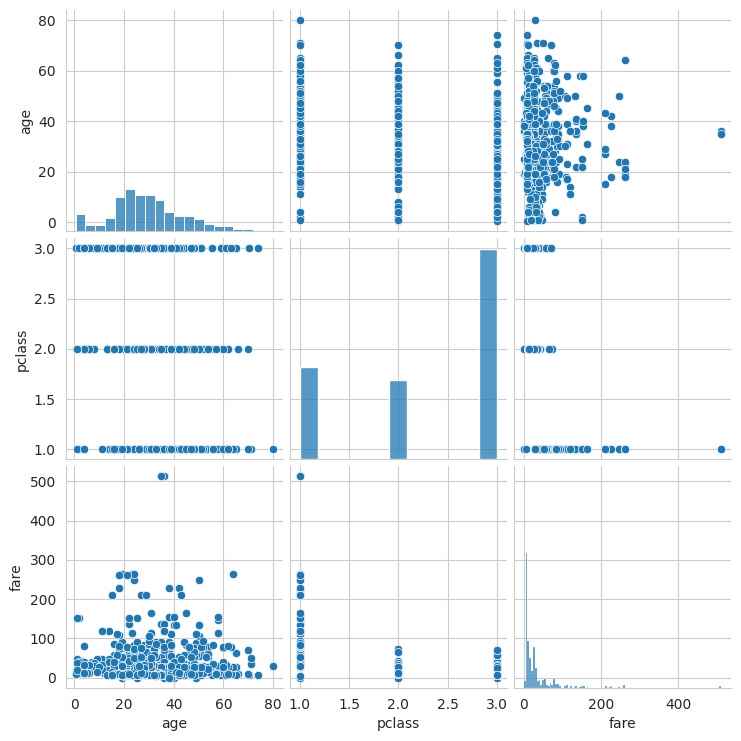

In [22]:
##이변수 데이터의 분포

#titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass','fare']]

#조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

**3. Folium 라이브러리 - 지도 활용**

- 지도 만들기
  - Folium 라이브러리의 Map() 함수 : 지도 객체 만들기
    - 줌, 화면 이동 모두 가능
- tiles 옵션 : 지도 스타일 변경
- 마커 위치 표시 : Markers() 함수에 위도 경도 정보 입력
  - popup 옵션 : 마커를 클릭했을 때 팝업창에 표시해주는 텍스트를 넣을 수 있음  
  - CircleMarker() : 원형 마커
- 단계구분도 : 행정구역과 같이 지도 상의 어떤 경계에 둘러싸인 영역에 색을 칠하거나 음영 등으로 정보를 나타내는 시각화 방법
  - Choropleth()


In [23]:
##지도 만들기

#라이브러리 불러오기
import folium

#서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.9],zoom_start=12)

#지도를 HTML 파일로 저장하기
seoul_map.save('./seoul.html')

In [24]:
##지도 스타일 적용하기

#라이브러리 불러오기
import folium

#서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',zoom_start=12)  #산악 지형 등의 지형이 보다 선명하게 드러난다
seoul_map3 = folium.Map(location=[37.55,126.98],tiles='Stamen Toner',zoom_start=15)    #흑백 스타일로 도로망을 강조해서 보여준다

#지도를 HTML 파일로 저장하기
seoul_map2.save('./seoul2.html')
seoul_map3.save('.seoul3.html')

In [27]:
##지도에 마커 표시하기

#라이브러리 불러오기
import pandas as pd
import folium

#대학교 리스트 데이터프레임으로 변환
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/24-1 ESAA/서울지역 대학교 위치.xlsx')
df.head()

#서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',zoom_start=12)

#대학교 위치 정보를 Marker로 표시
for name, lat, lng in zip(df.index,df.위도,df.경도):
  folium.Marker([lat,lng],popup=name).add_to(seoul_map)

#지도를 HTML 파일로 저장하기
seoul_map.save('./seoul_colleges.html')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
##지도에서 원형 마커 표시

#대학교 위치 정보를 CircleMarker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat,lng],
                      radius=10,             #원의 반지름
                      color='brwon',         #원의 둘레 색상
                      fill=True,
                      fill_color='coral',    #원을 채우는 색
                      fill_opacity=0.7,      #투명도
                      popup=name
                      ).add_to(seoul_map)

#지도를 HTML 파일로 저장하기
seoul_map.save('./seoul_colleges2.html')

In [29]:
##지도 영역에 단계구분도(Choropleth Map) 표시하기

#라이브러리 불러오기
import pandas as pd
import folium
import json

#경기도 인구변화 데이터를 불러와서 데이터 프레임으로 변환
file_path = '/content/drive/MyDrive/Colab Notebooks/24-1 ESAA/경기도인구데이터.xlsx'
df = pd.read_excel(file_path,index_col='구분')
df.columns = df.columns.map(str)

#경기도 시군구 경계 정보를 가지 geo-json 파일 불러오기
geo_path = '/content/drive/MyDrive/Colab Notebooks/24-1 ESAA/경기도행정구역경계.json'
try:
  geo_data = json.load(open(geo_path,encoding='utf-8'))
except:
  geo_data = json.load(open(geo_path,encoding='utf-8-sig'))


#경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982],tiles='Stamen Terrain',zoom_start=9)

#출력할 연도 선택 (2007~2017 중에서 선택)
year = '2007'

#Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data = geo_data,                                            #지도 경계
                  data = df[year],                                                #표시하려는 데이터
                  coulmns = [df.index,df[year]],                                  #열 지정
                  fill_color = 'YlOrRd',fill_opacity = 0.7,line_opacity=0.3,
                  threshold_scale = [10000,100000,300000,500000,700000],
                  key_on = 'feature.properties.name'
                  ).add_to(g_map)

#지도를 HTML 파일로 저장하기
g_map.save('./gyonggi_population_'+year+'.html')